**MSc Computational Physics AUTH**<br>
**Computational Nuclear Physics**<br>
**Academic Year: 2023-2024**<br>
**Semester 2**<br>
**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Presentation date: 9/7/2024**

# **PROJECT #2:** ***Calculating the composition of the outer crust of nonaccreting neutron stars***
**Jupyter Notebook**<br> 

**Contents:**<br>
*->1. Brief theoretical introduction*<br>
*->2. Codes*<br>
*->3. Results*

**References:**<br>
*1. PhysRevC.73.035804*<br>
*2. PhysRevC.78.025807*

## **1. Brief theoretical introduction**

In this assignment we are trying to calculate the composition of the outer-crust on a neutron star. For this we need the **binding energy** and the **total nuclear mass** per nucleon for the system of nuclei in the crust.

Starting from an **isolated nucleus**, it's binding energy per nucleon is given by:
$$BE_{iso}(x,y) = a_v - \frac{a_s}{x} - a_cx^2y^2 - a_a(1 - 2y)^2$$
where $x=A^{1/3}$ and $y=\frac{Z}{A}$. As of the constants, we have:

$a_v$: coefficient for the **Volume** term<br>
$a_s$: coefficient for the **Surface** term<br>
$a_c$: coefficient for the **Coulomb** term<br>
$a_a$: coefficient for the **Assymetry** term

with values in $MeV$. The total nuclear mass per nucleon is then:
$$e_n(x,y) = m_py + m_n(1-y) - BE_{iso}(x,y) = m_py + m_n(1-y) - a_v + \frac{a_s}{x} + a_cx^2y^2 + a_a(1 - 2y)^2$$
with $m_p$ and $m_n$ the mass of proton and neutron in $MeV$, respectively. We care to find the values of $x$ and $y$, that result to the most stable nucleus, that is the lowest possible nuclear mass (or equivalently, the highest possible binding energy). To do so, we differentiate $e_n$ with respect to $x$ and $y$ and solve the linear system that occurs, when we equate the derivatives with zero. We have:
$$\left(\frac{\partial e_n}{\partial x}\right)_y = 0 => -\frac{a_s}{x^2} +2a_cxy^2 = 0$$
$$\left(\frac{\partial e_n}{\partial x}\right)_x = 0 => -\Delta m +2a_cx^2y-4a_a(1-2y) = 0$$
After the calculation of $x$ and $y$ we can easily find the values for mass number $A$, atomic number $Z$ and neutrons number $N$ through th formulas:
$$A=x^3$$
$$Z=y*A$$
$$N = A-Z$$

On the other hand, when in the outer-crust nuclei form crystalline systems, due to the density of nucleons $n$. In fact, the density $n$ is the one that determines the most stable lattice structure, that is the type of nuclei that form the crystals with the lowest energy per nucleon. Therefore, we have to take the lattice contribution into considderation when calculating the total energy:
$$e(x,y,p_F) =  m_py + m_n(1-y) - a_v + \frac{a_s}{x} + a_cx^2y^2 + a_a(1 - 2y)^2 + \frac{3}{4}y^{4/3}p_F + C_lx^2y^2p_F$$
where $p_F$ is the **Fermi's momentum** and $C_l$ the lattice coefficient. Fermi's momentum is associated with the density of nucleons through the formula:
$$p_F = \hbar c(3π^2n)^{1/3}$$

Thus, in order to find the most stable nucleus in the outer-crust for a certain density $n$, we solve the following linear system for $x$ and $y$:
$$\left(\frac{\partial e}{\partial x}\right)_{y,p_F} = 0 => -\frac{a_s}{x^2} +2\tilde{a}_cxy^2 = 0$$
$$\left(\frac{\partial e}{\partial x}\right)_{x,p_F} = 0 => -\Delta m +2\tilde{a}_cx^2y-4a_a(1-2y) +y^{1/3}p_F= 0$$
where:
$$\tilde{a}_c(p_F) = a_c - C_lp_F$$
the **'renormalized' Coulomb** coefficient.

## **2. Codes**

First, we import the necessary **Python** libraries (modules). We use:

1. **Numpy** library for numerical calculations
2. **Sympy** library for symbolic display and symbolic calculations
3. **Scipy** library for solving systems of equations
4. **Matplotlib** library for plotting and visualization
5. **PrettyTable** library for displaying the results of the calculations

In [1]:
import numpy as np
import sympy as smp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from prettytable import PrettyTable

### **2.1 Preliminary work: defining constants and useful functions**

In [74]:
# Constants definition
a_v = 15.71511 # coefficient for the Volume term in binding energy (unit: MeV)
a_s = 17.53638 # coefficient for the Surface term in binding energy (unit: MeV)
a_c = 0.71363 # coefficient for the Coulomb term in binding energy (unit: MeV)
a_a = 23.37837 # coefficient for the Assymetry term in binding energy (unit: MeV)
m_n =  939.565 # neutron's mass MeV/c^2
m_p = 938.272 # proton's mass MeV/c^2
C_l = 3.40665*10**(-3) # coefficient for lattice contribution in total energy per nucleon
hbarc = 197.327 #MeV*fm
Dm = m_n - m_p # mass difference between neutron and proton
m = 1.674*(10**(-24)) # nucleon's mean mass in gr

In [ ]:
# Elements Atomic Number Table
elements = [
    [1, 'H'], [2, 'He'], [3, 'Li'], [4, 'Be'], [5, 'B'], [6, 'C'], [7, 'N'], [8, 'O'], [9, 'F'], [10, 'Ne'],
    [11, 'Na'], [12, 'Mg'], [13, 'Al'], [14, 'Si'], [15, 'P'], [16, 'S'], [17, 'Cl'], [18, 'Ar'], [19, 'K'], [20, 'Ca'],
    [21, 'Sc'], [22, 'Ti'], [23, 'V'], [24, 'Cr'], [25, 'Mn'], [26, 'Fe'], [27, 'Co'], [28, 'Ni'], [29, 'Cu'], [30, 'Zn'],
    [31, 'Ga'], [32, 'Ge'], [33, 'As'], [34, 'Se'], [35, 'Br'], [36, 'Kr'], [37, 'Rb'], [38, 'Sr'], [39, 'Y'], [40, 'Zr'],
    [41, 'Nb'], [42, 'Mo'], [43, 'Tc'], [44, 'Ru'], [45, 'Rh'], [46, 'Pd'], [47, 'Ag'], [48, 'Cd'], [49, 'In'], [50, 'Sn'],
    [51, 'Sb'], [52, 'Te'], [53, 'I'], [54, 'Xe'], [55, 'Cs'], [56, 'Ba'], [57, 'La'], [58, 'Ce'], [59, 'Pr'], [60, 'Nd'],
    [61, 'Pm'], [62, 'Sm'], [63, 'Eu'], [64, 'Gd'], [65, 'Tb'], [66, 'Dy'], [67, 'Ho'], [68, 'Er'], [69, 'Tm'], [70, 'Yb'],
    [71, 'Lu'], [72, 'Hf'], [73, 'Ta'], [74, 'W'], [75, 'Re'], [76, 'Os'], [77, 'Ir'], [78, 'Pt'], [79, 'Au'], [80, 'Hg'],
    [81, 'Tl'], [82, 'Pb'], [83, 'Bi'], [84, 'Po'], [85, 'At'], [86, 'Rn'], [87, 'Fr'], [88, 'Ra'], [89, 'Ac'], [90, 'Th'],
    [91, 'Pa'], [92, 'U'], [93, 'Np'], [94, 'Pu'], [95, 'Am'], [96, 'Cm'], [97, 'Bk'], [98, 'Cf'], [99, 'Es'], [100, 'Fm'],
    [101, 'Md'], [102, 'No'], [103, 'Lr'], [104, 'Rf'], [105, 'Db'], [106, 'Sg'], [107, 'Bh'], [108, 'Hs'], [109, 'Mt'], 
    [110, 'Ds'], [111, 'Rg'], [112, 'Cn'], [113, 'Nh'], [114, 'Fl'], [115, 'Mc'], [116, 'Lv'], [117, 'Ts'], [118, 'Og']
]

# Find element from atomic number
def find_elmt(Z):
    m = len(elements)
    for i in range(0,m):
        if elements[i][0]==Z:
            return elements[i][1]
            break
    return 'no element'      


In [68]:
# Fermi's momentum in MeV
def pF(n):
    pi_2 = np.pi**2
    return np.power(3*pi_2*n*10**(-39),1/3)*hbarc # n multiplied by 10^(-39) to be converted to fm^(-3)

# Neucleon's density n in cm^(-3)
def n_dens(pF):
    pi_2 = np.pi**2
    return pow(pF/hbarc,3)/(3*pi_2)*10**(39) # multiplied by 10^(-39) so n to be caclulated in cm^(-3)

# Renormalized coefficient for the Coulomb term in binding energy (unit: MeV), including lattice contribution
def a_cbar(n,Cl):
    return a_c - Cl*pF(n)

In [58]:
# Total energy per nucleon of isolated nucleus (unit = MeV)
def En(x,y): 
    return (m_p*y) + (m_n*(1 - y)) - a_v + (a_s/x) + (a_c*(x**2)*(y**2)) + (a_a*(1 - (2*y))**2)

# Binding energy per nucleon of isolated nucleon (unit = MeV)
def BEn(x,y):
    return  (m_p*y) + (m_n*(1 - y)) - En(x,y)

# Total energy per nucleon for the system of nuclei in outer-crust (unit = MeV)
def Ecrust(x,y,pf):
    return (m_p*y) + (m_n*(1 - y)) - a_v + (a_s/x) + (a_c*(x**2)*(y**2)) + (a_a*(1 - 2*y)**2) + ((3/4)*(y**(4/3)*pf)) - (C_l*(x**2)*(y**2)*pf)

# Binding energy per nucelon for the system of nuclei in outer-crust (unit = MeV)
def BEcrust(x,y,pf):
    return  (m_p*y) + (m_n*(1 - y)) - Ecrust(x,y,pf)

### **2.2 Solving the system equations to find $x$ and $y$**

#### *2.2.1 Solution for isolated nuclei*

In [5]:
# Solving the system of x and y for isolated nuclei
def sol_iso(initial_guess):
    def equations_iso(vars):
        x,y = vars
        eq1 = -a_s/(x**2) + 2*a_c*x*y**2
        eq2 = -Dm+2*a_c*(x**2)*y-4*a_a*(1-2*y)
        return [eq1,eq2]
    [x1,y1] = fsolve(equations_iso, initial_guess)
    A = x1**3
    Z = A*y1
    N = A-Z
    return [x1,y1,A,Z,N]

#### *2.2.2 Solution for nuclei in the outer-crust (of a neutron star)*

In [19]:
# Solving the system of x and y for nuclei in the outer-crust
def sol_crust(initial_guess,n,Cl):
    def equations_crust(vars):
        x,y = vars
        eq1 = -a_s/(x**2) + 2*a_cbar(n,Cl)*x*y**2
        eq2 = -Dm+2*a_cbar(n,Cl)*(x**2)*y-4*a_a*(1-2*y)+pF(n)*np.power(y,1/3)
        return [eq1,eq2]
    [x1,y1] = fsolve(equations_crust, initial_guess)
    A = x1**3
    Z = A*y1
    N = A-Z
    return [x1,y1,A,Z,N]

#### *2.2.3 Linear approximation for nuclei in the outer-crust (of a neutron star)*

In [7]:
# Linear approximation for the solution of the system for nuclei in the outer-crust
def lin_approx(n):
    x = 3.90610 + 0.03023*pF(n)
    y = 0.45405 - 0.00419*pF(n)
    return [x,y]

### **2.3 Plotting the results**

In [94]:
def results_iso_crust(pF_low,pF_high,plot_points):
    # Isolated nucleus results
    x_iso,y_iso,A_iso,Z_iso,N_iso = sol_iso([1,1]) # appending the solutions of the system
    E_iso = En(x_iso,y_iso) # total energy/nuclear mass per nucleon of the most stable isolated nucleus
    BE_iso = BEn(x_iso,y_iso) # binding energy per nucleon of the most stable isolated nucleus
    print(">ISOLATED NUCLEUS RESULTS (most stable nucleus)")
    print("------------------------------------------------------")
    print("A = %.3f"%A_iso)
    print("Z = %.3f"%Z_iso)
    print("N = %.3f"%N_iso)
    print("BE = %.3f MeV (binding energy per nucleon)"%BE_iso)
    print("m = M/A = %.3f MeV (nuclear mass per nucleon)"%E_iso)
    print("------------------------------------------------------\n\n")

    # Neutron star outer-crust results
    # Defining result presentation lists
    protons_areas = PrettyTable()
    neutrons_areas = PrettyTable()
    total_composition_results = PrettyTable()
    
    # Storage lists for the linear approximation results
    x_lin = []
    y_lin = []
    
    # Storage lists for the exact solution of x,y when Cl = 0
    x_exactCl0 = []
    y_exactCl0 = []
    
    # Storage lists for the exact solution of x,y
    x_exact = []
    y_exact = []
    
    # Storage lists for n,A,Z,N,BE,total energy and element names
    nlist = []
    rholist = []
    Alist = []
    Zlist = []
    Nlist = []
    BE_crust_vals = []
    E_crust_vals = []
    elmt_name = []
    
    # Storage lists for same Z areas
    n_area_Z = []
    pF_area_Z = []
    rho_area_Z = []
    Z_in_area = []
    composition_elmt = []
    
    # Storage lists for same N areas
    n_area_N = []
    pF_area_N = []
    rho_area_N = []
    N_in_area = []
    
    # Storage lists for the text coordinates in the composition plot
    text_pos_x1 = [] 
    text_pos_y1 = []
    
    # Storage list for rounded values of A,Z and N to be included in the composition plot
    massnumber = []
    protons = []
    neutrons = []

    pF_range = np.linspace(pF_low,pF_high,plot_points) # Fermi's momentum space plot area
    nstart1 = n_dens(pF_range[0])
    nstart2 = n_dens(pF_range[0])
    i = 0
    j = 0
    for pF_vals in pF_range:
        n = n_dens(pF_vals) 
        
        # linear approximation of x,y
        x_lin.append(lin_approx(n)[0])
        y_lin.append(lin_approx(n)[1])
        
        # exact solution for x,y when Cl=0
        x_exactCl0.append(sol_crust([1,1],n,0)[0])
        y_exactCl0.append(sol_crust([1,1],n,0)[1])
        
        # exact solution for x,y and calculated values for A,Z and N 
        x,y,A,Z,N = sol_crust([1,1],n,C_l)
        x_exact.append(x)
        y_exact.append(y)
        
        
        # rounding the values of A,Z,N
        A_round = round(A)
        Z_round = round(Z)
        N_round = A_round - Z_round
        elmt = find_elmt(Z_round)

        nlist.append("%.4e"%n)
        rholist.append("%.4e"%(m*n))
        elmt_name.append(find_elmt(Z_round))
        Alist.append("%.d (%.3f)"%(A_round,A))
        Zlist.append("%.d (%.3f)"%(Z_round,Z))
        Nlist.append("%.d (%.3f)"%(N_round,N))
        BE_crust_vals.append("%.3f"%BEcrust(x,y,pF_vals))
        E_crust_vals.append("%.3f"%Ecrust(x,y,pF_vals))


        massnumber.append(A_round)
        protons.append(Z_round)
        neutrons.append(N_round)
        
        # finding the stable Z or N areas
        Zold = protons[i-1]
        Nold = neutrons[i-1]
        if n>nstart1 and Z_round!=Zold:
            if j%2==0: # draw the text higher than the composition plot
                c = 2.7+i/plot_points
            else: # draw the text lower than the composition plot
                c= -2.7-i/plot_points
            nend1=n       
            elmt = find_elmt(Zold)
            composition_elmt.append(elmt)
            text_pos_x1.append(pF(nstart1))
            text_pos_y1.append(Zold+c)
            n_area_Z.append("%.4e - %.4e"%(nstart1,n))
            rho_area_Z.append("%.4e - %.4e"%(m*nstart1,m*n))
            pF_area_Z.append("%.4f - %.4f"%(pF(nstart1),pF(n)))
            Z_in_area.append(Zold)
            nstart1 = n
            j = j+1
        if n>nstart2 and N_round!=Nold:
            n_area_N.append("%.4e - %.4e"%(nstart2,n))
            rho_area_N.append("%.4e - %.4e"%(m*nstart2,m*n))
            pF_area_N.append("%.4f - %.4f"%(pF(nstart2),pF(n)))
            N_in_area.append(Nold)
            nstart2 = n
        i = i+1
    
    print(">NEUTRON STAR RESULTS\n\n")
    print(">>OUTER-CRUST COMPOSITION RESULTS (Same Z areas):")
    protons_areas.add_column("Z",Z_in_area)
    protons_areas.add_column("Element",composition_elmt)
    protons_areas.add_column("n area (cm)^(-3)",n_area_Z)
    protons_areas.add_column("ρ area gr*(cm)^(-3)",rho_area_Z)
    protons_areas.add_column("pF area (MeV)",pF_area_Z)
    print(protons_areas)

    print("\n\n>>OUTER-CRUST COMPOSITION RESULTS (Same N areas):")
    neutrons_areas.add_column("N",N_in_area)
    neutrons_areas.add_column("n area (cm)^(-3)",n_area_N)
    neutrons_areas.add_column("ρ area gr*(cm)^(-3)",rho_area_N)
    neutrons_areas.add_column("pF area (MeV)",pF_area_N)
    print(neutrons_areas)

    print("\n\n>>OUTER-CRUST COMPOSITION RESULTS (total results):")  
    total_composition_results.add_column("Element",elmt_name)
    total_composition_results.add_column("Z (Z calc.)",Zlist)
    total_composition_results.add_column("N (N calc.)",Nlist)
    total_composition_results.add_column("A (A calc.)",Alist)
    total_composition_results.add_column("Bind Enrg (MeV)",BE_crust_vals)
    total_composition_results.add_column("Mass per nucleon (MeV)",E_crust_vals)
    total_composition_results.add_column("n (cm)^(-3)",nlist)
    total_composition_results.add_column("ρ gr*(cm)^(-3)",rholist)
    total_composition_results.add_column("pF (MeV)",pF_range)
    print(total_composition_results)

    print("\n\n>>GRAPHS")
    
    # plot the x,y vs pF graphs
    fig1, axes1 = plt.subplots(2,1)
    ax1 = axes1[0]
    ax1.plot(pF_range,y_exact,lw=1.5,color="black",label="Exact")
    ax1.plot(pF_range,y_exactCl0,'--',lw=1.5,color="red",label="Exact ($c_L = 0$)")
    ax1.plot(pF_range,y_lin,'--',lw=1.5,color="blue",label="Linear Approx.")
    ax1.set_ylabel("$y = Z/A$")
    ax1.set_title('Liquid-Drop Model') 
    ax1.grid()
    ax1.legend()
    ax1 = axes1[1]
    ax1.plot(pF_range,x_exact,lw=1.5,color="black",label="Exact")
    ax1.plot(pF_range,x_exactCl0,'--',lw=1.5,color="red",label="Exact ($c_L = 0$)")
    ax1.plot(pF_range,x_lin,'--',lw=1.5,color="blue",label="Linear Approx.")
    ax1.set_xlabel("$p_F = \hbar c(3\pi^2n)^{1/3}$ (MeV)") 
    ax1.set_ylabel("$x = A^{1/3}$")
    ax1.legend(loc=4)
    ax1.grid()
    
    # plot the composition plot
    fig2, ax2 = plt.subplots(1,1)
    #ax2.plot(nlist,massnumber,"-",lw=1.5,color="red",label="A = Z + N")
    ax2.plot(pF_range,protons,"-",lw=1.5,color="blue",label="Protons (Z)")    
    ax2.plot(pF_range,neutrons,"-",lw=1.5,color="green",label="Neutrons (N)")
    m1 = len(composition_elmt)
    for i in range(0,m1):
        ax2.text(text_pos_x1[i],text_pos_y1[i],composition_elmt[i])
    ax2.set_xlabel("$p_F = \hbar c(3\pi^2n)^{1/3}$ (MeV)")
    ax2.set_ylabel("Composition")
    ax2.set_title("Composition Results")
    ax2.legend()
    ax2.grid()
    plt.show()
    
    

## **3. Results**

>ISOLATED NUCLEUS RESULTS (most stable nucleus)
------------------------------------------------------
A = 59.599
Z = 27.061
N = 32.538
BE = 8.783 MeV (binding energy per nucleon)
m = M/A = 930.194 MeV (nuclear mass per nucleon)
------------------------------------------------------


>NEUTRON STAR RESULTS


>>OUTER-CRUST COMPOSITION RESULTS (Same Z areas):
+----+---------+-------------------------+-------------------------+-------------------+
| Z  | Element |     n area (cm)^(-3)    |   ρ area gr*(cm)^(-3)   |   pF area (MeV)   |
+----+---------+-------------------------+-------------------------+-------------------+
| 27 |    Co   | 0.0000e+00 - 1.9129e+31 | 0.0000e+00 - 3.2023e+07 |  0.0000 - 1.6327  |
| 28 |    Ni   | 1.9129e+31 - 2.9890e+32 | 3.2023e+07 - 5.0035e+08 |  1.6327 - 4.0816  |
| 29 |    Cu   | 2.9890e+32 - 1.2243e+33 | 5.0035e+08 - 2.0494e+09 |  4.0816 - 6.5306  |
| 30 |    Zn   | 1.2243e+33 - 3.1827e+33 | 2.0494e+09 - 5.3278e+09 |  6.5306 - 8.9796  |
| 31 |    Ga   | 

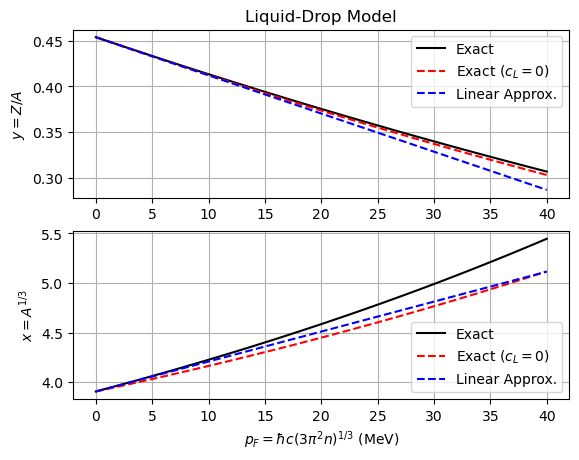

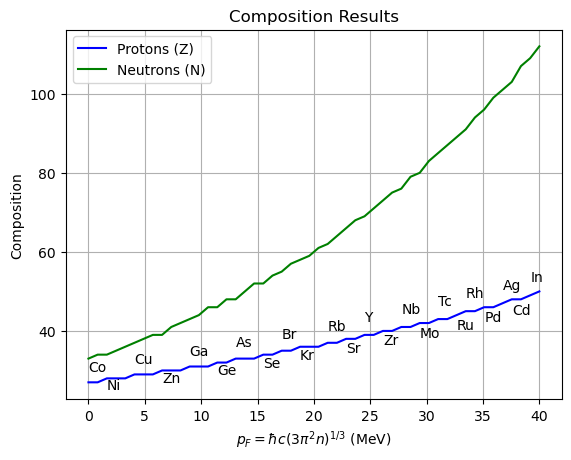

In [95]:
results_iso_crust(0,40,50)